# Análise Exploratória [Dados de Vinho e Derivados]

Neste notebook tem relatórios iniciais, explicando a quantidade de vinhos exportados e os fatores externos que podem vir a surgir e que interferem nas análises:
1. Dados climáticos.
2. Dados demográficos.
3. Dados econômicos.
4. Dados de avaliações de vinhos.

# Configurações, Instalações e Imports

In [1]:
pip install --upgrade pandas


[notice] A new release of pip available: 22.3.1 -> 23.1.2
[notice] To update, run: python3.11 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


# Leitura dos Dados

In [2]:
import pandas as pd

In [3]:
path = "/Users/annakarolinymatias/Documents/datavisualization/data_sources/exportacao_vinho_2021.csv"

In [14]:
df = pd.read_csv(path, sep=";")

In [17]:
df.head(10)

,Id,País,1970,1970.1,1971,1971.1,1972,1972.1,1973,1973.1,...,2017,2017.1,2018,2018.1,2019,2019.1,2020,2020.1,2021,2021.1
0,1,Afeganistão,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,11,46
1,2,África do Sul,0,0,0,0,0,0,0,0,...,0,0,0,0,26,95,4,21,0,0
2,3,"Alemanha, República Democrática",0,0,0,0,4168,2630,12000,8250,...,15467,87702,10794,45382,3660,25467,6261,32605,2698,6741
3,4,Angola,0,0,0,0,0,0,0,0,...,10170,61680,477,709,345,1065,0,0,0,0
4,5,Anguilla,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,6,Antígua e Barbuda,0,0,0,0,0,0,0,0,...,0,0,37,191,219,1549,624,1864,805,2268
6,7,Antilhas Holandesas,280,207,4800,3705,3000,1936,0,0,...,5400,8550,0,0,0,0,0,0,0,0
7,8,Argentina,0,0,0,0,0,0,0,0,...,0,0,15711,59150,0,0,1015,4176,6,13
8,9,Aruba,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,10,Austrália,0,0,0,0,0,0,0,0,...,1350,7500,2055,6902,1161,4682,1013,3413,705,4034


In [18]:
df = df.drop("Id", axis=1)

In [19]:
df.columns[73:]

Index(['2006', '2006.1', '2007', '2007.1', '2008', '2008.1', '2009', '2009.1',
       '2010', '2010.1', '2011', '2011.1', '2012', '2012.1', '2013', '2013.1',
       '2014', '2014.1', '2015', '2015.1', '2016', '2016.1', '2017', '2017.1',
       '2018', '2018.1', '2019', '2019.1', '2020', '2020.1', '2021', '2021.1'],
      dtype='object')

In [ ]:
df.mean().index.tolist()

# Verificando diferença entre colunas
Exemplo: "2006" vs "2006.1"



In [20]:
cols_diff = ['2006', '2006.1']
df_diff = df.loc[:, cols_diff]

In [21]:
df_diff.describe()

,2006,2006.1
count,1.240000e+02,124.000000
mean,2.754287e+04,21436.346774
std,1.824443e+05,101289.236489
min,0.000000e+00,0.000000
25%,0.000000e+00,0.000000
50%,0.000000e+00,0.000000
75%,5.150000e+01,65.250000
max,1.947106e+06,873636.000000


In [22]:
df_diff.mean()

2006      27542.870968
2006.1    21436.346774
dtype: float64

# Selecionando colunas no intervalo dos ultimos 15 anos (2006 - 2021)

In [23]:
select_cols = ['País', '2006', '2006.1', '2007', '2007.1', '2008', '2008.1', '2009', '2009.1',
       '2010', '2010.1', '2011', '2011.1', '2012', '2012.1', '2013', '2013.1',
       '2014', '2014.1', '2015', '2015.1', '2016', '2016.1', '2017', '2017.1',
       '2018', '2018.1', '2019', '2019.1', '2020', '2020.1', '2021', '2021.1']
df_base = df.loc[:, select_cols]

In [24]:
df_base

,País,2006,2006.1,2007,2007.1,2008,2008.1,2009,2009.1,2010,...,2017,2017.1,2018,2018.1,2019,2019.1,2020,2020.1,2021,2021.1
0,Afeganistão,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,11,46
1,África do Sul,0,0,0,0,0,0,0,0,0,...,0,0,0,0,26,95,4,21,0,0
2,"Alemanha, República Democrática",38302,89231,119512,238052,265742,429970,225086,393482,27715,...,15467,87702,10794,45382,3660,25467,6261,32605,2698,6741
3,Angola,3766,18293,25931,49753,25721,71083,54786,84235,33557,...,10170,61680,477,709,345,1065,0,0,0,0
4,Anguilla,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119,Tuvalu,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,2,4,0,0
120,Uruguai,1008,1685,0,0,0,0,0,0,914,...,0,0,7711,29617,6180,18497,0,0,136774,149842
121,Vanuatu,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,18,31,0,0
122,Venezuela,0,0,20700,27370,0,0,0,0,0,...,680,2646,71,355,0,0,4086,9808,26415,35944


In [25]:
df_base.describe()

,2006,2006.1,2007,2007.1,2008,2008.1,2009,2009.1,2010,2010.1,...,2017,2017.1,2018,2018.1,2019,2019.1,2020,2020.1,2021,2021.1
count,1.240000e+02,124.000000,1.240000e+02,124.000000,1.240000e+02,1.240000e+02,1.240000e+02,1.240000e+02,124.000000,124.000000,...,1.240000e+02,1.240000e+02,1.240000e+02,1.240000e+02,1.240000e+02,1.240000e+02,1.240000e+02,1.240000e+02,1.240000e+02,1.240000e+02
mean,2.754287e+04,21436.346774,2.646574e+04,29727.016129,8.343809e+04,5.740403e+04,2.057597e+05,7.210474e+04,10327.209677,20929.862903,...,2.330300e+04,5.754522e+04,3.109808e+04,6.037148e+04,2.542640e+04,4.786150e+04,3.556223e+04,4.901845e+04,6.498955e+04,7.945115e+04
std,1.824443e+05,101289.236489,1.300438e+05,114488.354013,5.911326e+05,2.645627e+05,1.971109e+06,5.207585e+05,52629.464316,73994.478704,...,2.151520e+05,4.068725e+05,2.905604e+05,4.952064e+05,2.180765e+05,3.489597e+05,2.990085e+05,3.542205e+05,5.881470e+05,6.497120e+05
min,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.500000e+00,6.500000e+00,1.000000e+01,3.000000e+01,1.950000e+01,6.950000e+01
75%,5.150000e+01,65.250000,9.422500e+02,2723.500000,1.532250e+03,7.075500e+03,3.125000e+02,2.615250e+03,442.500000,1078.500000,...,4.072500e+02,2.259000e+03,2.721000e+03,9.769750e+03,8.175000e+02,2.905000e+03,1.274750e+03,4.881250e+03,1.881000e+03,8.194750e+03
max,1.947106e+06,873636.000000,1.285459e+06,810038.000000,6.207658e+06,2.352768e+06,2.191291e+07,5.732280e+06,510989.000000,478630.000000,...,2.393468e+06,4.274650e+06,3.234168e+06,5.494321e+06,2.419537e+06,3.826587e+06,3.299013e+06,3.869243e+06,6.522527e+06,7.192362e+06


# Retirando dados nulos

In [26]:
df_base.dropna(subset=select_cols).describe()

,2006,2006.1,2007,2007.1,2008,2008.1,2009,2009.1,2010,2010.1,...,2017,2017.1,2018,2018.1,2019,2019.1,2020,2020.1,2021,2021.1
count,1.240000e+02,124.000000,1.240000e+02,124.000000,1.240000e+02,1.240000e+02,1.240000e+02,1.240000e+02,124.000000,124.000000,...,1.240000e+02,1.240000e+02,1.240000e+02,1.240000e+02,1.240000e+02,1.240000e+02,1.240000e+02,1.240000e+02,1.240000e+02,1.240000e+02
mean,2.754287e+04,21436.346774,2.646574e+04,29727.016129,8.343809e+04,5.740403e+04,2.057597e+05,7.210474e+04,10327.209677,20929.862903,...,2.330300e+04,5.754522e+04,3.109808e+04,6.037148e+04,2.542640e+04,4.786150e+04,3.556223e+04,4.901845e+04,6.498955e+04,7.945115e+04
std,1.824443e+05,101289.236489,1.300438e+05,114488.354013,5.911326e+05,2.645627e+05,1.971109e+06,5.207585e+05,52629.464316,73994.478704,...,2.151520e+05,4.068725e+05,2.905604e+05,4.952064e+05,2.180765e+05,3.489597e+05,2.990085e+05,3.542205e+05,5.881470e+05,6.497120e+05
min,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.500000e+00,6.500000e+00,1.000000e+01,3.000000e+01,1.950000e+01,6.950000e+01
75%,5.150000e+01,65.250000,9.422500e+02,2723.500000,1.532250e+03,7.075500e+03,3.125000e+02,2.615250e+03,442.500000,1078.500000,...,4.072500e+02,2.259000e+03,2.721000e+03,9.769750e+03,8.175000e+02,2.905000e+03,1.274750e+03,4.881250e+03,1.881000e+03,8.194750e+03
max,1.947106e+06,873636.000000,1.285459e+06,810038.000000,6.207658e+06,2.352768e+06,2.191291e+07,5.732280e+06,510989.000000,478630.000000,...,2.393468e+06,4.274650e+06,3.234168e+06,5.494321e+06,2.419537e+06,3.826587e+06,3.299013e+06,3.869243e+06,6.522527e+06,7.192362e+06


<Axes: xlabel='País'>

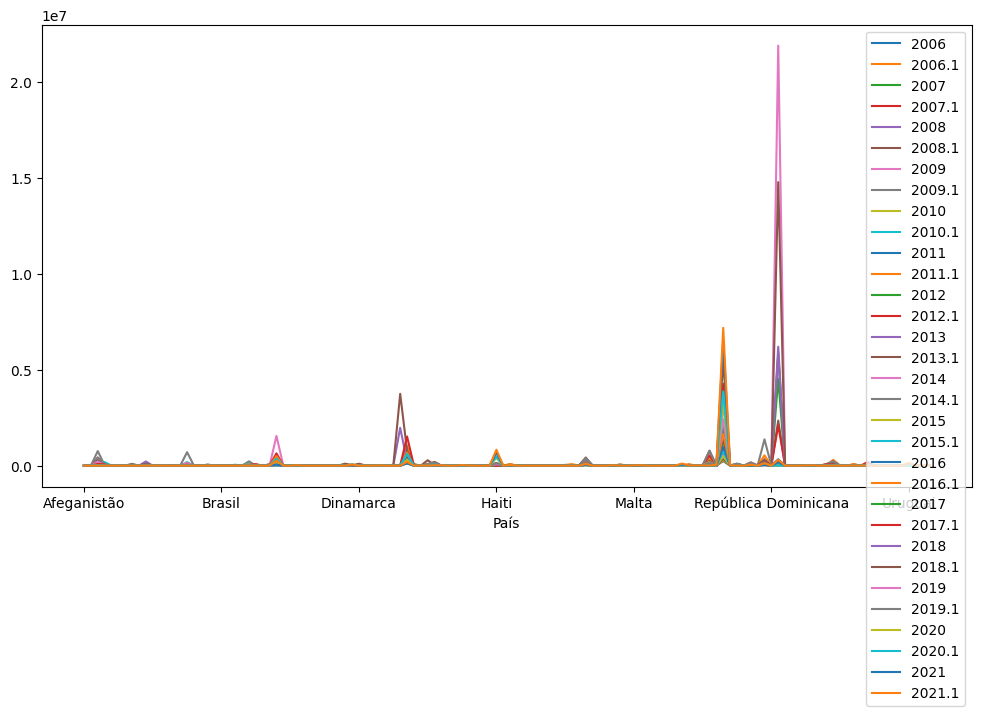

In [30]:
df_base.plot(x="País", figsize=(12,6))